# Úkol č. 4 - regrese
**Deadline úkolu je uveden na [course pages](https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html).**

  * Cílem tohoto úkolu je vyzkoušet si řešit regresní problém na reálných datech.
  
> **Nejdůležitější na úkolu je to, abyste udělali vše procesně správně: korektní rozdělení datasetu, ladění hyperparametrů, vyhodnocení výsledků atp.**

## Dataset

  * Zdrojem dat je soubor `LifeExpectancyData.csv` na course pages (originál zde: https://www.kaggle.com/kumarajarshi/life-expectancy-who).
  * Popis datasetu najdete na uvedené stránce s originálem datasetu.
  * Cílová (vysvětlovaná) proměnná se jmenuje `Life expectancy `.
  

## Pokyny k vypracování
Body zadání, za jejichž (poctivé) vypracování získáte 12 bodů:

  1. Odeberte z dat body u kterých neznáte vysvětlovanou proměnnou.
  1. Rozdělte data na trénovací a testovací množinu.
  1. Proveďte základní průzkum dat. Na jeho základě adekvátně reagujte na problematické věci v datech (chybějící hodnoty, atd.).
  1. Aplikujte lineární a hřebenovou regresi a výsledky řádně vyhodnoťte:
    * K měření chyby použijte `mean_absolute_error`.
    * Experimentujte s tvorbou nových příznaků (na základě těch dostupných).
    * Experimentujte se standardizací/normalizací dat.
    * Vyberte si hyperparametry modelů k ladění a najděte jejich nejlepší hodnoty.
  1. Použijte i jiný model než jen lineární a hřebenovou regresi.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte tento Jupyter Notebook.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [1]:
### odtud už je to Vaše
import pandas as pd
df = pd.read_csv('LifeExpectancyData.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
#priprava dat 

In [5]:
def get_null(df):
    arr = []
    for i in df.columns:
        arr.append({'col':i,'count_null':df[i].isnull().sum()})
    ddf = pd.DataFrame(arr)
    #display(ddf.where(ddf['count_null']>0).dropna())
    k=ddf.sort_values(by = 'col')
    print(k.where(k['count_null']>0).dropna())

In [6]:
get_null(df)

                                col  count_null
10                             BMI         34.0
18             thinness  1-19 years        34.0
19               thinness 5-9 years        34.0
4                   Adult Mortality        10.0
6                           Alcohol       194.0
14                      Diphtheria         19.0
16                              GDP       448.0
8                       Hepatitis B       553.0
20  Income composition of resources       167.0
3                  Life expectancy         10.0
12                            Polio        19.0
17                       Population       652.0
21                        Schooling       163.0
13                Total expenditure       226.0


In [7]:
#rozdeleni dat
#df['Life expectancy ']=df['Life expectancy '].fillna(value=df['Life expectancy '].mean())
#df['Adult Mortality']=df['Adult Mortality'].fillna(value=df['Adult Mortality'].mean())
#df['Polio']=df['Polio'].fillna(value=df['Polio'].mean())
res = df['Life expectancy ']
df = df.drop(['Life expectancy '],axis=1)
get_null(df)

                                col  count_null
9                              BMI         34.0
17             thinness  1-19 years        34.0
18               thinness 5-9 years        34.0
3                   Adult Mortality        10.0
5                           Alcohol       194.0
13                      Diphtheria         19.0
15                              GDP       448.0
7                       Hepatitis B       553.0
19  Income composition of resources       167.0
11                            Polio        19.0
16                       Population       652.0
20                        Schooling       163.0
12                Total expenditure       226.0


In [480]:
"""cor = df.corr()
ind = cor.index
cor = cor.unstack()
pop = 0
pop_1 = 0 
sorted_pairs = cor.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
for i in range(0,len(strong_pairs)):
    if ((df[strong_pairs.index[i][0]].isnull().sum()!=0 and df[strong_pairs.index[i][1]].isnull().sum()==0) or (df[strong_pairs.index[i][0]].isnull().sum()==0 and df[strong_pairs.index[i][1]].isnull().sum()!=0)) and strong_pairs.index[i][0]!=strong_pairs.index[i][1]:
        print(strong_pairs.index[i][0],"\t",strong_pairs.index[i][1],"\t",strong_pairs.iloc[i])
        if strong_pairs.iloc[i]>pop:
            pop = strong_pairs.iloc[i]
            pop_1=i
print("----",strong_pairs.index[pop_1][0],"\t",strong_pairs.index[pop_1][1],"\t",strong_pairs.iloc[pop_1])"""

'cor = df.corr()\nind = cor.index\ncor = cor.unstack()\npop = 0\npop_1 = 0 \nsorted_pairs = cor.sort_values(kind="quicksort")\nstrong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]\nfor i in range(0,len(strong_pairs)):\n    if ((df[strong_pairs.index[i][0]].isnull().sum()!=0 and df[strong_pairs.index[i][1]].isnull().sum()==0) or (df[strong_pairs.index[i][0]].isnull().sum()==0 and df[strong_pairs.index[i][1]].isnull().sum()!=0)) and strong_pairs.index[i][0]!=strong_pairs.index[i][1]:\n        print(strong_pairs.index[i][0],"\t",strong_pairs.index[i][1],"\t",strong_pairs.iloc[i])\n        if strong_pairs.iloc[i]>pop:\n            pop = strong_pairs.iloc[i]\n            pop_1=i\nprint("----",strong_pairs.index[pop_1][0],"\t",strong_pairs.index[pop_1][1],"\t",strong_pairs.iloc[pop_1])'

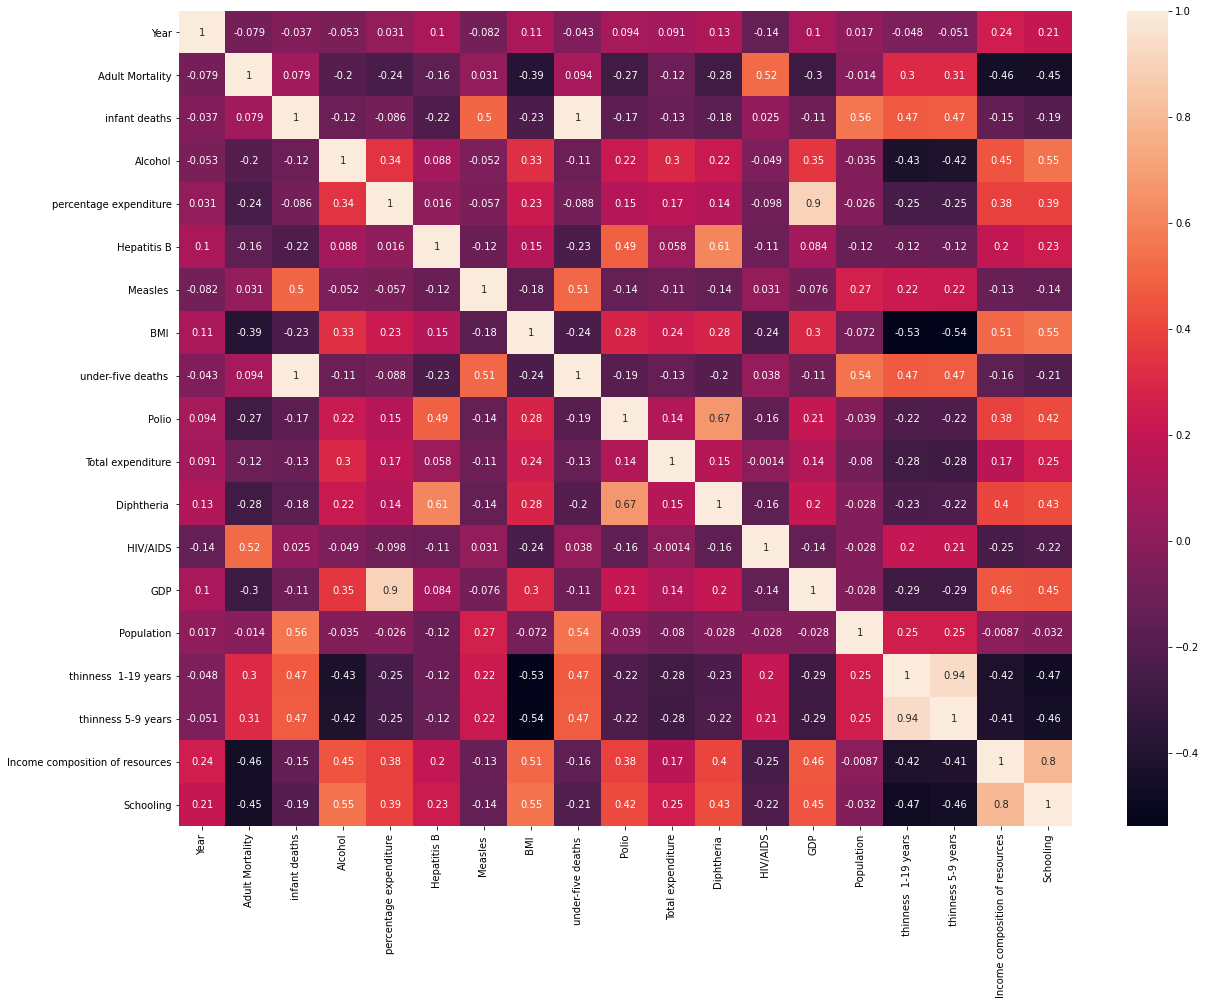

In [8]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
def get_corel(l):
    plt.subplots(figsize=(20,15))
    sns.heatmap(l.corr(), annot=True)
get_corel(df)

In [9]:
df['lol']=0

In [514]:
"""#sns.scatterplot(x=df['under-five deaths '],y=df['infant deaths'])
l_Schooling = LinearRegression()
df_1 = df[['under-five deaths ','infant deaths']]
#print(df_1['infant deaths'].isnull().sum())
df_2 = df_1[['under-five deaths ','infant deaths']].dropna()
df_2['l']=0
df_1['l']=0
Y = df_2['under-five deaths ']
X = df_2[['l','infant deaths']]
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=42) 
l_Schooling.fit(xtrain, ytrain)
#print(mean_absolute_error(l_Schooling.predict(xtest), ytest))
#sns.scatterplot(x=df_1['under-five deaths '],y=df_1['infant deaths'])
l_Schooling.predict(df_1[['l','infant deaths']])
"""

"#sns.scatterplot(x=df['under-five deaths '],y=df['infant deaths'])\nl_Schooling = LinearRegression()\ndf_1 = df[['under-five deaths ','infant deaths']]\n#print(df_1['infant deaths'].isnull().sum())\ndf_2 = df_1[['under-five deaths ','infant deaths']].dropna()\ndf_2['l']=0\ndf_1['l']=0\nY = df_2['under-five deaths ']\nX = df_2[['l','infant deaths']]\nxtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=42) \nl_Schooling.fit(xtrain, ytrain)\n#print(mean_absolute_error(l_Schooling.predict(xtest), ytest))\n#sns.scatterplot(x=df_1['under-five deaths '],y=df_1['infant deaths'])\nl_Schooling.predict(df_1[['l','infant deaths']])\n"

In [10]:
for i in df.columns:
    print(i)

Country
Year
Status
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling
lol


In [11]:
import math
import numpy as np

In [ ]:
#f-ce pro doplnovani vsech dat

In [12]:

def assign_age(row,ind_1,ind_2,regg):
    
    if np.isnan(row[ind_1]):
        #print(ind_1,ind_2)
        data = None
        #print(int(math.floor(reg.predict([[row['title'],row['sibsp'],row['parch']]])[0])))
        try:
            #'title','sibsp', 'parch'
            data = math.floor(regg.predict([[row['lol'],row[ind_2]]])[0])
            row[ind_1] = data
        except BaseException:
            row[ind_1] = np.NaN
    return row







def apply_some(df_f,ind_1,ind_2):
    
    l_Schooling = LinearRegression()
    df_1 = df_f[[ind_1,ind_2]]
    #print(df_1['infant deaths'].isnull().sum())
    df_2 = df_1[[ind_1,ind_2]].dropna()
    df_2['l']=0
    df_1['l']=0
    Y = df_2[ind_1]
    X = df_2[['l',ind_2]]
    #print(X)
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=42) 
    #print(xtrain,ytrain)
    l_Schooling.fit(xtrain, ytrain)
    #print(mean_absolute_error(l_Schooling.predict(xtest), ytest),l_Schooling.score(l_Schooling.predict(ytrain), ytest))
    #print(l_Schooling.score(xtest,ytest))
    print(ind_2, "\t",l_Schooling.score(xtest,ytest), "\t",mean_absolute_error(l_Schooling.predict(xtest), ytest))
    
    df_f = df_f.apply(lambda row: assign_age(row,ind_2,ind_1,l_Schooling), axis=1)
    #print(get_null(df_f))
    #return df_f
    #sns.scatterplot(x=df_1['under-five deaths '],y=df_1['infant deaths'])
    #print(df_1[ind_1].isnull().sum(),df_1ind_2)
    #print(df_1[ind_2].isnull().sum())
    #l_Schooling.predict(df_1[['l',ind_2]])
    return df_f








def get_max_corr(df_f):
    cor = df_f.corr()
    ind = cor.index
    cor = cor.unstack()
    pop = -1
    pop_1 = 0 
    sorted_pairs = cor.sort_values(kind="quicksort")
    strong_pairs = sorted_pairs[abs(sorted_pairs) > 0]
    for i in range(0,len(strong_pairs)):
        
        #if df_f[strong_pairs.index[i][0]].isnull().sum()==0 or df_f[strong_pairs.index[i][1]].isnull().sum()==0:
        #print(strong_pairs.iloc[i],df_f[strong_pairs.index[i][0]].isnull().sum(),df_f[strong_pairs.index[i][1]].isnull().sum())
        if ((df_f[strong_pairs.index[i][0]].isnull().sum()!=0 and df_f[strong_pairs.index[i][1]].isnull().sum()==0) or (df_f[strong_pairs.index[i][0]].isnull().sum()==0 and df_f[strong_pairs.index[i][1]].isnull().sum()!=0)) and strong_pairs.index[i][0]!=strong_pairs.index[i][1]:
            #print(strong_pairs.index[i][0],"\t",strong_pairs.index[i][1],"\t",strong_pairs.iloc[i],df[strong_pairs.index[i][0]].isnull().sum(),df[strong_pairs.index[i][1]].isnull().sum())
            if strong_pairs.iloc[i]>pop:
                pop = strong_pairs.iloc[i]
                pop_1=i
    
    if(df_f[strong_pairs.index[pop_1][0]].isnull().sum()==0):
        df_f = apply_some(df_f,strong_pairs.index[pop_1][0],strong_pairs.index[pop_1][1])
    else:
        df_f = apply_some(df_f,strong_pairs.index[pop_1][1],strong_pairs.index[pop_1][0])
    print("----",strong_pairs.index[pop_1][0],"\t",strong_pairs.index[pop_1][1],"\t",strong_pairs.iloc[pop_1])
    return df_f
    
    
    


In [13]:
#zacinam soplnovat daty
    
pop = get_max_corr(df)
pop = get_max_corr(pop)
pop = get_max_corr(pop)
print(get_null(pop))

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


GDP 	 0.8088483825471415 	 394.6463112517556
---- percentage expenditure 	 GDP 	 0.8993726409895392


/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Population 	 0.3203993839904288 	 33.728088777852186
---- Population 	 infant deaths 	 0.5568013322696023


/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Adult Mortality 	 0.3149757492563199 	 2.192853278365989
----  HIV/AIDS 	 Adult Mortality 	 0.52382050790262
                                col  count_null
9                              BMI         34.0
17             thinness  1-19 years        34.0
18               thinness 5-9 years        34.0
5                           Alcohol       194.0
13                      Diphtheria         19.0
7                       Hepatitis B       553.0
19  Income composition of resources       167.0
11                            Polio        19.0
20                        Schooling       163.0
12                Total expenditure       226.0
None


In [14]:
pop = get_max_corr(pop)
print(get_null(pop))

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


 thinness 5-9 years 	 0.21038780973879911 	 59.236740497413464
---- under-five deaths  	  thinness 5-9 years 	 0.47226282665009506
                                col  count_null
9                              BMI         34.0
17             thinness  1-19 years        34.0
5                           Alcohol       194.0
13                      Diphtheria         19.0
7                       Hepatitis B       553.0
19  Income composition of resources       167.0
11                            Polio        19.0
20                        Schooling       163.0
12                Total expenditure       226.0
None


In [15]:
pop = get_max_corr(pop)
print(get_null(pop))

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


 thinness  1-19 years 	 0.8966136024319933 	 0.3856254861403381
----  thinness 5-9 years 	  thinness  1-19 years 	 0.9391019921914692
                                col  count_null
9                              BMI         34.0
5                           Alcohol       194.0
13                      Diphtheria         19.0
7                       Hepatitis B       553.0
19  Income composition of resources       167.0
11                            Polio        19.0
20                        Schooling       163.0
12                Total expenditure       226.0
None


In [16]:
pop = get_max_corr(pop)
print(get_null(pop))

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Income composition of resources 	 0.2018652028365373 	 7612.116400521639
---- GDP 	 Income composition of resources 	 0.44286996200771506
                  col  count_null
9                BMI         34.0
5             Alcohol       194.0
13        Diphtheria         19.0
7         Hepatitis B       553.0
11              Polio        19.0
20          Schooling       163.0
12  Total expenditure       226.0
None


In [17]:
pop = get_max_corr(pop)
print(get_null(pop))

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Schooling 	 0.20471685126831585 	 7562.161861530824
---- GDP 	 Schooling 	 0.43651135691924314
                  col  count_null
9                BMI         34.0
5             Alcohol       194.0
13        Diphtheria         19.0
7         Hepatitis B       553.0
11              Polio        19.0
12  Total expenditure       226.0
None


In [18]:
pop = get_max_corr(pop)
print(get_null(pop))

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Alcohol 	 0.128025898519175 	 1024.5268811904689
---- Alcohol 	 percentage expenditure 	 0.34128531282066765
                  col  count_null
9                BMI         34.0
13        Diphtheria         19.0
7         Hepatitis B       553.0
11              Polio        19.0
12  Total expenditure       226.0
None


In [19]:
pop = get_max_corr(pop)
print(get_null(pop))

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


 BMI  	 0.07272684201770063 	 7672.890735457785
----  BMI  	 GDP 	 0.2736323845279782
                  col  count_null
13        Diphtheria         19.0
7         Hepatitis B       553.0
11              Polio        19.0
12  Total expenditure       226.0
None


In [20]:
pop = get_max_corr(pop)
print(get_null(pop))

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Polio 	 0.040795997344124424 	 8068.568732185825
---- GDP 	 Polio 	 0.18938194370179876
                  col  count_null
13        Diphtheria         19.0
7         Hepatitis B       553.0
12  Total expenditure       226.0
None


In [22]:
pop = get_max_corr(pop)
print(get_null(pop))

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Diphtheria  	 0.5416045683502961 	 7.839051935013343
---- Diphtheria  	 Polio 	 0.6735533206902242
                  col  count_null
7         Hepatitis B       553.0
12  Total expenditure       226.0
None


In [23]:
pop = get_max_corr(pop)
print(get_null(pop))

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Hepatitis B 	 0.37126573799439944 	 8.793561150675517
---- Diphtheria  	 Hepatitis B 	 0.6114949490184355
                  col  count_null
12  Total expenditure       226.0
None


In [33]:
pop = get_max_corr(pop)
print(get_null(pop))

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Total expenditure 	 0.028602362990349683 	 1137.8053856060587
---- percentage expenditure 	 Total expenditure 	 0.1744196891639246
Empty DataFrame
Columns: [col, count_null]
Index: []
None


In [34]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult Mortality                  2938 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total expenditure   

In [35]:
def assign_Status(row):
    
    if row['Status'] == 'Developing':
        row['Status'] = 1
    else:
        row['Status'] = 0
    return row
pop_1 = pop.apply(lambda row: assign_Status(row), axis=1)


In [36]:
display(pop_1)

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,lol
0,Afghanistan,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,Afghanistan,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,Afghanistan,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,Afghanistan,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,Afghanistan,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,1,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0
2934,Zimbabwe,2003,1,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0
2935,Zimbabwe,2002,1,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0
2936,Zimbabwe,2001,1,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0


In [37]:
pop_1 = pop_1.drop(columns=['Country','Year','lol'])

In [38]:
pop_1

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,1,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,1,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,1,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [406]:
#daty jsou pripraveny

In [39]:
#res = df['Life expectancy ']
#df = df.drop(['Life expectancy '],axis=1)
res=res.fillna(value=res.mean())
xtrain, xtest, ytrain, ytest = train_test_split(pop_1, res, test_size=0.25, random_state=42) 

In [43]:
Linear = LinearRegression()
Linear.fit(xtrain, ytrain)
mean_absolute_error(Linear.predict(xtest),ytest)

4.564942846924563

In [44]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV
Rid = Ridge()
Rid.fit(xtrain, ytrain)
mean_absolute_error(Rid.predict(xtest),ytest)

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.24894e-17): result may not be accurate.
  overwrite_a=True).T


4.5642794596188345

In [45]:
Ridcv = RidgeCV()
Ridcv.fit(xtrain, ytrain)
mean_absolute_error(Ridcv.predict(xtest), ytest)


228.22775780229253

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
ridge = [10,25,50,100, 200, 230, 250,265, 270, 275, 290, 300, 500]
for i in ridge:
    rid = Ridge(alpha = i)
    rid.fit(xtrain, ytrain)
    print(mean_absolute_error(rid.predict(xtest), ytest) )

4.5585667999105315
4.551266293023703
4.5439223790866805
4.5416476780457735
4.555123434640376
4.559951904854707
4.562970394732942
4.565193052506315
4.56590505591142
4.566602775167807
4.56861430521544
4.56998693548956
4.592432623928583


/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.41006e-17): result may not be accurate.
  overwrite_a=True).T
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.67862e-17): result may not be accurate.
  overwrite_a=True).T
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.1263e-17): result may not be accurate.
  overwrite_a=True).T
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.02196e-17): result may not be accurate.
  overwrite_a=True).T
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.81444e-17): result may not be accurate.
  overwr

In [47]:
lasso = [10,25,50,100, 200, 230, 250,265, 270, 275, 290, 300, 500]
for i in lasso:
    las = Lasso(alpha = i)
    las.fit(xtrain, ytrain)
    print(mean_absolute_error(las.predict(xtest), ytest))

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9143.553503197261, tolerance: 19.919020381312656
  positive)
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285.3543420519418, tolerance: 19.919020381312656
  positive)


4.940642901980061
4.945161347656038


/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.64074597650324, tolerance: 19.919020381312656
  positive)
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114.25603087841591, tolerance: 19.919020381312656
  positive)


4.973939794447575
5.05049586503644


/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.113524791871896, tolerance: 19.919020381312656
  positive)
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.34963443619199, tolerance: 19.919020381312656
  positive)


5.206115356663678
5.255114514373195


/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.12263201121823, tolerance: 19.919020381312656
  positive)
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.01440330380865, tolerance: 19.919020381312656
  positive)


5.290755544434377
5.317956761647317


/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.37038233979547, tolerance: 19.919020381312656
  positive)
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.75555070009432, tolerance: 19.919020381312656
  positive)


5.327333128313949
5.3369070095778675
5.366383390295503
5.386280621445589
5.953432464665789


/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.08525574374653, tolerance: 19.919020381312656
  positive)
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.116114764517988, tolerance: 19.919020381312656
  positive)


In [48]:
ridge = [70,75,80,85,90,95,100,105]
for i in ridge:
    Rid = Ridge(alpha = i)
    Rid.fit(xtrain, ytrain)
    print(mean_absolute_error(Rid.predict(xtest), ytest))

4.541516990585934
4.541290681511725
4.541296021094724
4.541354308977296
4.541410516123813
4.541507492824651
4.5416476780457735
4.541885758752753


/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.48451e-17): result may not be accurate.
  overwrite_a=True).T
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.57408e-17): result may not be accurate.
  overwrite_a=True).T
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.66365e-17): result may not be accurate.
  overwrite_a=True).T
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.75322e-17): result may not be accurate.
  overwrite_a=True).T
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.8428e-17): result may not be accurate.
  overwr

In [49]:
Rid = [70,71,72,73,74,75,76,77,78,79]
for i in ridge:
    Rid = Ridge(alpha = i)
    Rid.fit(xtrain, ytrain)
    print(mean_absolute_error(Rid.predict(xtest), ytest))

4.541516990585934
4.541468642087368
4.541420578756231
4.541372797849137
4.54132529665424
4.541290681511725
4.541276955290951
4.541281808251768
4.5412866031617165
4.541291340587895


/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.48451e-17): result may not be accurate.
  overwrite_a=True).T
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.50243e-17): result may not be accurate.
  overwrite_a=True).T
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.52034e-17): result may not be accurate.
  overwrite_a=True).T
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.53825e-17): result may not be accurate.
  overwrite_a=True).T
/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.55616e-17): result may not be accurate.
  overw

In [50]:
best_res = 76

In [51]:
#zkusime transformovat data
pop_2=pop_1
#pop_2['Life expectancy ']=res
#display(pop_2)

In [53]:
sc = RobustScaler()
Xnn = sc.fit_transform(pop_2)
x_train, x_test, y_train, y_test = train_test_split(Xnn, res, test_size=0.25, random_state=39) 

In [55]:
Linear = LinearRegression()
Linear.fit(x_train, y_train)
mean_absolute_error(Linear.predict(x_test), y_test)

3.9680837500642676

In [56]:
Ridcv = RidgeCV()
Ridcv.fit(x_train, y_train)
mean_absolute_error(Ridcv.predict(x_test), y_test)

6.093961146101906

In [58]:
ridge = [10,25,50,100, 200, 230, 250,265, 270, 275, 290, 300, 500]
for i in ridge:
    Rid = Ridge(alpha = i)
    Rid.fit(x_train, y_train)
    print(mean_absolute_error(Rid.predict(x_test), y_test))

3.96356910490885
3.9609770964728535
3.9645396247119153
3.9983527130164975
4.082446415569079
4.109486792210358
4.127280985431225
4.140399311063448
4.144682389448339
4.1489393247062205
4.161822776400915
4.17028533345158
4.31695689644728


In [59]:
lasso = [10,25,50,100, 200, 230, 250,265, 270, 275, 290, 300, 500]
for i in lasso:
    Las = Lasso(alpha = i)
    Las.fit(x_train, y_train)
    print(mean_absolute_error(Las.predict(x_test), y_test))

6.121308401951963
7.011057395611373
7.747157479210955
7.7479778307691625
7.749620518612985
7.752018104988546
7.7536461193752055
7.7548671301651995
7.755274133761865
7.755681137358529
7.756902507285015
7.757716513474209
7.770088351407697


In [60]:
#zkusime pridat stat
dummy=pd.get_dummies(df['Country'])
dummy

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
X=pd.concat([pop_2,dummy],axis=1)

In [62]:
X

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,0
1,1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,0
2,1,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,0
3,1,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,0
4,1,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,0,0,0,0,0,0,0,0,0,1
2934,1,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,0,0,0,0,0,0,0,0,0,1
2935,1,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,0,0,0,0,0,0,0,0,0,1
2936,1,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
sc = RobustScaler()
Xnn = sc.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(Xnn, res, test_size=0.25, random_state=39) 

In [65]:
Rid = Ridge()
Rid.fit(x_train, y_train)
mean_absolute_error(Rid.predict(x_test), y_test)

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.40276e-18): result may not be accurate.
  overwrite_a=True).T


1.6354597673333573

In [66]:
Linear = LinearRegression()
Linear.fit(x_train, y_train)
mean_absolute_error(Linear.predict(x_test), y_test)

282.87258271452856

In [68]:
sc = RobustScaler()
Xnn = sc.fit_transform(pop_2)
x_train, x_test, y_train, y_test = train_test_split(Xnn, res, test_size=0.25, random_state=39) 
Linear = LinearRegression()
Linear.fit(x_train, y_train)
mean_absolute_error(Linear.predict(x_test), y_test)

3.9680837500642676

In [512]:
#dataset bez statu funguje lepsi

In [70]:
sc = StandardScaler()
Xnn = sc.fit_transform(pop_1)
xtrain, xtest, ytrain, ytest = train_test_split(Xnn, res, test_size=0.25, random_state=39) 

In [71]:
Linear = LinearRegression()
Linear.fit(xtrain, ytrain)
mean_absolute_error(Linear.predict(xtest), ytest)

3.968083750008823

In [72]:
#nejlepsi

In [74]:
sc = RobustScaler()
Xnn = sc.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(Xnn, res, test_size=0.25, random_state=39) 
Rid = Ridge()
Rid.fit(x_train, y_train)
mean_absolute_error(Rid.predict(x_test), y_test)

/mnt/d/code/bi-vzd/du_2/myenv/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.40276e-18): result may not be accurate.
  overwrite_a=True).T


1.6354597673333573